# importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from google.colab import files

# uploading dataset in csv form

In [3]:
upload=files.upload()
upload

Saving loan prediction1.csv to loan prediction1.csv


{'loan prediction1.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,

In [4]:
import io

In [5]:
df=pd.read_csv(io.BytesIO(upload['loan prediction1.csv']))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# checking the nullvalues

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

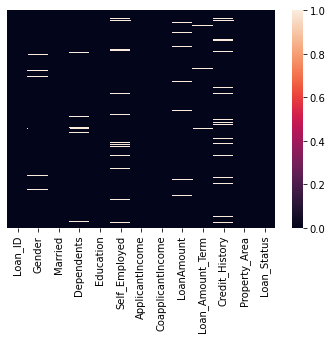

In [7]:
sns.heatmap(df.isnull(),yticklabels=False)


# data preprocessing

In [8]:
for cols in df:
  df[cols]=pd.get_dummies(df[cols])

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,1,1,1,0,1,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,1,1
2,0,0,0,1,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,1,0,0,0,0,0


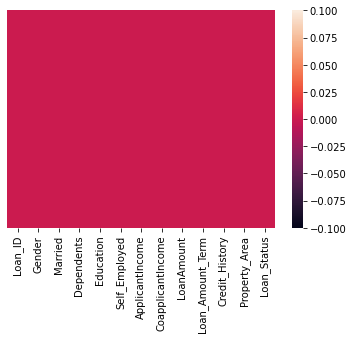

In [10]:
sns.heatmap(df.isnull(),yticklabels=False)

# separate dependent and independent values

In [11]:
x=df[:]
x.drop(['Loan_ID','Loan_Status'],axis=1,inplace=True)
x

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,1,1,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,1
2,0,0,1,1,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0
4,0,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,1,1,0,1,0,0,0,1
610,0,0,0,1,1,0,1,0,0,0,1
611,0,0,0,1,1,0,0,0,0,0,0
612,0,0,0,1,1,0,1,0,0,0,0


In [12]:
y=df['Loan_Status']
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: uint8

# converting training and testing tests

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [15]:
x_train[0:2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
74,0,0,0,1,0,0,0,0,0,0,0
385,0,1,0,1,0,0,1,0,0,0,0


In [16]:
x_train.shape

(460, 11)

In [17]:
y_train

74     0
385    0
504    0
61     0
159    0
      ..
129    1
144    0
72     0
235    0
37     0
Name: Loan_Status, Length: 460, dtype: uint8

In [18]:
y_train.shape

(460,)

# creating neural model

In [100]:
model=keras.models.Sequential()

In [101]:
model.add(keras.layers.Flatten(input_shape=[11]))
model.add(keras.layers.Dense(60,activation='relu'))
model.add(keras.layers.Dense(45,activation='relu'))
model.add(keras.layers.Dense(1))

In [102]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 11)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 60)                720       
_________________________________________________________________
dense_35 (Dense)             (None, 45)                2745      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 46        
Total params: 3,511
Trainable params: 3,511
Non-trainable params: 0
_________________________________________________________________


# compilation and model fitting

In [103]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [104]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
15/15 [==============================] - 0s 1ms/step - loss: 1.0702 - accuracy: 0.6370
Epoch 2/30
15/15 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6261
Epoch 3/30
15/15 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.7283
Epoch 4/30
15/15 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7261
Epoch 5/30
15/15 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7522
Epoch 6/30
15/15 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7739
Epoch 7/30
15/15 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7957
Epoch 8/30
15/15 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8065
Epoch 9/30
15/15 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8109
Epoch 10/30
15/15 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.8152
Epoch 11/30
15/15 [

#  model evaluation

In [105]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.7521 - accuracy: 0.7922


[0.7520894408226013, 0.7922077775001526]

In [110]:
x_new=x_test[4:10]

# predicting the values

In [111]:
pred=np.round(model.predict(x_new))
pred

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)